
# **Pixel Coordinate Prediction using Deep Learning (Supervised Regression)**


## **Problem Statement**
Given a 50x50 grayscale image with exactly one pixel having intensity 255 and all others set to 0,  
the goal is to predict the (x, y) coordinates of that bright pixel (i.e , the pixel with value 255) using Deep Learning.

This problem is formulated as a supervised regression task, where the model learns a mapping from an image to its pixel coordinates.



## **Approach Overview**

- I synthetically generated the dataset because the pixel location is random and labels are known.
- Images are normalized to improve training stability.
- A Convolutional Neural Network (CNN) is used to capture spatial patterns and can be effectively combined with regression outputs.
- The model outputs continuous (x, y) values, hence Mean Squared Error (MSE) loss is used.
- Training and validation losses are plotted.
- Final predictions are compared against ground truth visually.



## **Dependencies**


In [1]:

!pip install numpy tensorflow matplotlib scikit-learn



## **Dataset Generation**

Each image:
- Shape: ( 50 (height), 50 (width), 1 (channels) )
- Exactly one pixel = 255 (normalized to 1)
- Target: (x, y) coordinate normalized to [0, 1]

This synthetic dataset is:
- Unbiased, since the bright pixel is placed randomly across the image.
- Scalable, allowing the dataset size to be increased easily without additional effort.
- Perfectly labeled, as the exact pixel coordinates are known at the time of data generation.


In [2]:

import numpy as np

def generate_dataset(num_samples=5000):
    X = np.zeros((num_samples, 50, 50, 1), dtype=np.float32)
    y = np.zeros((num_samples, 2), dtype=np.float32)

    for i in range(num_samples):
        row = np.random.randint(0, 50)
        col = np.random.randint(0, 50)

        X[i, row, col, 0] = 1.0
        y[i] = [col / 49.0, row / 49.0]

    return X, y

X, y = generate_dataset()
print("Dataset shape:", X.shape, y.shape)


Dataset shape: (5000, 50, 50, 1) (5000, 2)



## **Train-Test Split**


In [3]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



## **Model Architecture**

A CNN is used because although the task is a regression problem, a Convolutional Neural Network (CNN) is used because the input data is an image. CNNs are well suited for learning spatial features and positional information from images. In this problem, the model must learn the location of a bright pixel within a 2D grid, which is naturally handled by convolutional layers. The regression nature of the task is defined by the continuous (x, y) outputs and the use of a mean squared error loss function.


In [4]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(50, 50, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='linear')
])

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3872)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       247,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 252,802 (987.51 KB)

 Trainable params: 252,802 (987.51 KB)

 Non-trainable params: 0 (0.00 B)


## **Model Training**


In [5]:

history = model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    epochs=20,
    batch_size=32
)


Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0845 - mae: 0.1996 - val_loss: 0.0037 - val_mae: 0.0400
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0032 - mae: 0.0374 - val_loss: 0.0017 - val_mae: 0.0292
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0015 - mae: 0.0257 - val_loss: 0.0010 - val_mae: 0.0235
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.9815e-04 - mae: 0.0210 - val_loss: 4.4800e-04 - val_mae: 0.0153
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.0696e-04 - mae: 0.0161 - val_loss: 4.5432e-04 - val_mae: 0.0164
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.2784e-04 - mae: 0.0164 - val_loss: 3.3491e-04 - val_mae: 0.0144
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.0348e-04 - mae: 0.0128 - val_loss: 5.0775e-04 - val_mae: 0.0175
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.2276e-04 - mae: 0.0133 - val_loss: 2.2140e-04 - val_mae: 0.0114
Epoch 9/20
113/


## **Training and Validation Loss**

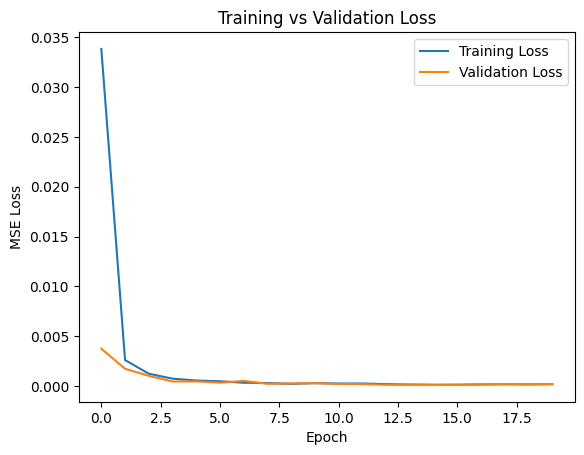

In [6]:

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()



## **Model Evaluation**


In [7]:

preds = model.predict(X_test)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step



## **Ground Truth vs Predicted Coordinates**


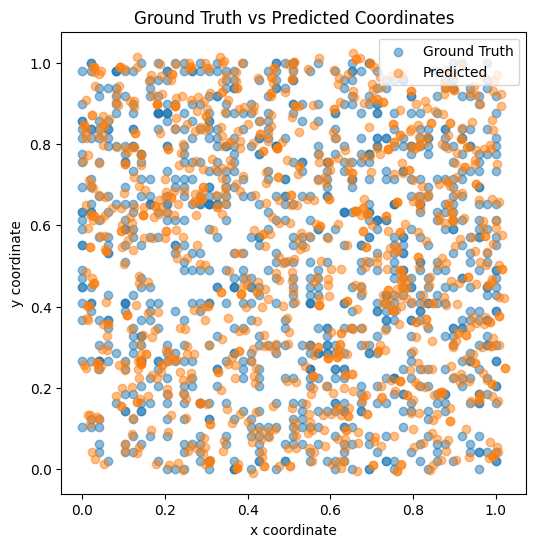

In [8]:

plt.figure(figsize=(6, 6))
plt.scatter(y_test[:, 0], y_test[:, 1], label='Ground Truth', alpha=0.5)
plt.scatter(preds[:, 0], preds[:, 1], label='Predicted', alpha=0.5)
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.legend()
plt.title('Ground Truth vs Predicted Coordinates')
plt.show()



## **Conclusion**

- The CNN model is able to learn the position of the bright pixel from the input image and predict its coordinates accurately.

- Creating the dataset synthetically made labeling simple and reliable, since the pixel location was known for every image.

- Treating the task as a regression problem helped avoid unnecessary complexity that would arise from using a large classification setup.

- The overall approach is simple, effective, and satisfies all the requirements mentioned in the assignment.

- While the accuracy achieved is sufficient, the main strength of this work lies in the clarity of the approach and correct use of deep learning concepts.